In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 

In [2]:
# Initialising and reading the data with pandas and adding the survived to test for simplicity
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_sub=pd.read_csv('gender_submission.csv')
test['Survived']=gender_sub['Survived']

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [5]:
train.info()
# Notice a few null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Notice null values

In [6]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

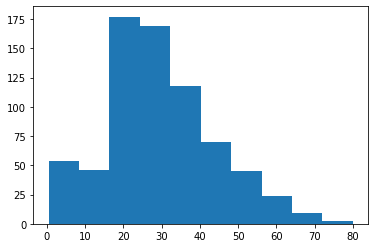

In [9]:
plt.hist(train.Age)

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

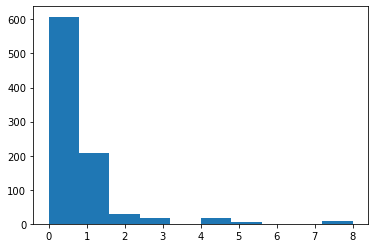

In [10]:
plt.hist(train.SibSp)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

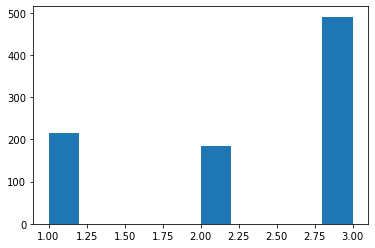

In [11]:
plt.hist(train.Pclass)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

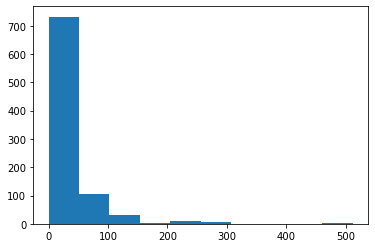

In [12]:
plt.hist(train.Fare)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

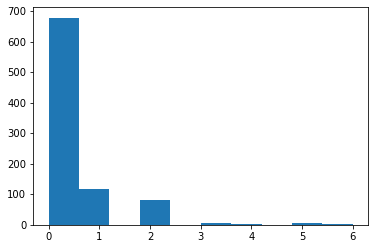

In [13]:
plt.hist(train.Parch)

In [14]:
#dropping the Irrelevent features from test and train like name ,passengerid, ticket info
train=train.drop(['PassengerId','Name','Ticket'],axis=1)
test=test.drop(['PassengerId','Name','Ticket'],axis=1)

In [15]:
# Now, checking for null values in train
train.isnull().sum()
#So age, cabina and embarked have missing values in train 
#since cabin is has high percentage of null values we drop cabin aas it will damage our prediction capabilities due to low data

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

In [17]:
#dropping cabin
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)
# dropping the 2 not available values of embarked as it is a small quantity and wont hurt training set
train.dropna(axis=0,subset=['Embarked'], inplace=True)

In [18]:
#filling age and fare in test and train with mean
train.Age=train.Age.fillna(train.Age.median())
test.Age=test.Age.fillna(test.Age.median())
test.Fare=test.Fare.fillna(test.Fare.median())
# train=train.interpolate(method='nearest',axis=0)
# test=test.interpolate(method='nearest',axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [20]:
# enumerating sex and embarked
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.Sex=le.fit_transform(train.Sex)
test.Sex=le.fit_transform(test.Sex)
train.Embarked=le.fit_transform(train.Embarked)
test.Embarked=le.fit_transform(test.Embarked)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.6 KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [22]:
# Normalising the data in Age and Fare as it has a large range, with Min Max normalisation
train.Age=(train.Age-train.Age.min())/ (train.Age.max() -train.Age.min())
train.Fare=(train.Fare-train.Fare.min())/ (train.Fare.max() -train.Fare.min())
test.Age=(test.Age-test.Age.min())/ (test.Age.max() -test.Age.min())
test.Fare=(test.Fare-test.Fare.min())/ (test.Fare.max() -test.Fare.min())
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


In [23]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,0.452723,0,0,0.015282,1,0
1,3,0,0.617566,1,0,0.013663,2,1
2,2,1,0.815377,0,0,0.018909,1,0
3,3,1,0.353818,0,0,0.016908,2,0
4,3,0,0.287881,1,1,0.023984,2,1
...,...,...,...,...,...,...,...,...
413,3,1,0.353818,0,0,0.015713,2,0
414,1,0,0.512066,0,0,0.212559,0,1
415,3,1,0.505473,0,0,0.014151,2,0
416,3,1,0.353818,0,0,0.015713,2,0


<AxesSubplot:>

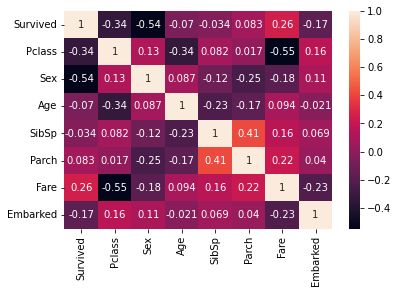

In [24]:
# heatmap for training set for additional insight
cor_matrix = train.corr()
sns.heatmap(cor_matrix,annot=True)

In [25]:
# Using Logistic Regression model 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

target = train['Survived']
features = train.drop(['Survived'], axis=1)
logRegFit = LogisticRegression().fit(features, target)

correctAns = test['Survived']                   # as we already transfered data from gender_sub to test for simplicity
features_test = test.drop(['Survived'], axis=1)

prediction = logRegFit.predict(features_test)

In [26]:
features


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.271174,1,0,0.014151,2
1,1,0,0.472229,1,0,0.139136,0
2,3,0,0.321438,0,0,0.015469,2
3,1,0,0.434531,1,0,0.103644,2
4,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...
886,2,1,0.334004,0,0,0.025374,2
887,1,0,0.233476,0,0,0.058556,2
888,3,0,0.346569,1,2,0.045771,2
889,1,1,0.321438,0,0,0.058556,0


In [27]:
features_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,1
1,3,0,0.617566,1,0,0.013663,2
2,2,1,0.815377,0,0,0.018909,1
3,3,1,0.353818,0,0,0.016908,2
4,3,0,0.287881,1,1,0.023984,2
...,...,...,...,...,...,...,...
413,3,1,0.353818,0,0,0.015713,2
414,1,0,0.512066,0,0,0.212559,0
415,3,1,0.505473,0,0,0.014151,2
416,3,1,0.353818,0,0,0.015713,2


In [28]:
accuracy_score(correctAns, prediction)

0.9521531100478469

In [29]:
# Using Random Forest
from sklearn.model_selection import train_test_split

train_features,test_features,train_target,test_correct=train_test_split(train.drop(['Survived'],axis=1),train['Survived'],test_size=0.35)

from sklearn.ensemble import RandomForestClassifier

randomForest=RandomForestClassifier(n_estimators=35)
ranForFit=randomForest.fit(train_features,train_target)
predict=ranForFit.predict(test_features)

accuracy_score(test_correct,predict)


0.7948717948717948

# So the final score 95.21% using Logistic Regression Model


In [35]:
pd.DataFrame(prediction).to_csv('final.csv',index=False)